In [1]:
import sys 
sys.path.append("../")

In [2]:
from mps_utils import * 
from wave_circuit import * 
import matplotlib.pyplot as plt 
import pickle

In [3]:
f1 = lambda x :  np.exp(-(x/2-0.5)**2/0.01)
df1 = lambda x: ( -(x/2-0.5)/(0.01) ) * f1(x)

f2 = lambda x :  (x/2-0.5)/0.01 * f1(x)
df2 = lambda x: (x/2-0.5)/0.01 * df1(x) + 50 * f1(x)

f3 = lambda x: (1-(x/2-0.5)**2/0.01) * f1(x)
df3 = lambda x: -(x/2-0.5)/0.01 * f1(x) + (1-(x/2-0.5)**2/0.01)*df1(x)

m = 4
l = 2**m
x_coarse = np.linspace(0,1,l+1)

In [4]:
p1 = get_polys(x_coarse,f1,df1)
p2 = get_polys(x_coarse,f2,df2)
p3 = get_polys(x_coarse,f3,df3)

def apply(p,x):
    return np.dot(p,[x**i for i in range(len(p))])

In [19]:
n = 4
N = 2**(n)
x = np.linspace(0, 1 - 1/N, N)

In [20]:
M_list1 = []
for i,p in enumerate(p1):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list1.append(M)

M_full1 = (reduce(lambda a,b: MPS_sum(a,b),M_list1))

M_list2 = []
for i,p in enumerate(p2):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list2.append(M)

M_full2 = (reduce(lambda a,b: MPS_sum(a,b),M_list2))

M_list3 = []
for i,p in enumerate(p3):
    reg = [i//2**_%2 for _ in range(m)[::-1]]
    M = MPS_poly(n,p,reg)
    M_list3.append(M)

M_full3 = (reduce(lambda a,b: MPS_sum(a,b),M_list3))

M_final1 = trunc_mps(M_full1,2)
M_final2 = trunc_mps(M_full2,2)
M_final3 = trunc_mps(M_full3,2)

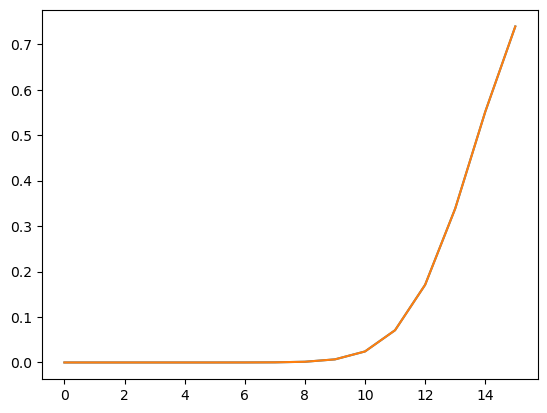

In [21]:
plt.plot(get_state(M_final1))
v = [f1(_) for _ in x]
plt.plot(v/np.linalg.norm(v))